**IMPORT THE DATASET**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load Dataset
df = pd.read_csv("customer_support_tickets_dirty.csv")

Saving customer_support_tickets_dirty.csv to customer_support_tickets_dirty.csv


In [ ]:
# Display the first few rows of the dataset and the info about the dataset
print(df.head())

                                                text         label  ticket_id  \
0    Where can I find API rate limits documentation?          Othr       1000   
1                 Can I migrate data from Freshdesk?          Othr       1001   
2  Cannot update billing address; page keeps relo...       billing       1002   
3  Looking for a product roadmap or upcoming feat...         other       1003   
4              Dark mode toggled but UI stays light.  Tech-support       1004   

  agent_name  
0       Dana  
1        Bob  
2    Charlie  
3       Dana  
4      Alice  


In [ ]:
df.shape[0]

520

In [ ]:
df.shape[1]

4

**EXPLORATORY DATA ANALYSIS (EDA)**

Analyze the data to understand its structure, identify missing values, and explore distributions of key features.

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [ ]:
# Print the information about the DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


In [ ]:
# Generate descriptive statistics for the numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,ticket_id
count,520.000000
mean,1259.500000
std,150.255338
min,1000.000000
25%,1129.750000
50%,1259.500000
75%,1389.250000
max,1519.000000


In [ ]:
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe(include='all'))


Descriptive Statistics for Numerical Columns:


,text,label,ticket_id,agent_name
count,495,495,520.000000,520
unique,180,16,NaN,4
top,Do you offer discounts for students or NGOs?,Accnt,NaN,Alice
freq,16,42,NaN,140
mean,NaN,NaN,1259.500000,NaN
std,NaN,NaN,150.255338,NaN
min,NaN,NaN,1000.000000,NaN
25%,NaN,NaN,1129.750000,NaN
50%,NaN,NaN,1259.500000,NaN
75%,NaN,NaN,1389.250000,NaN


In [ ]:
# Checking for the missing values
missing_values_count = df.isnull().sum()
print("missing values count per column:")
print(missing_values_count)

missing values count per column:
text          25
label         25
ticket_id      0
agent_name     0
dtype: int64


In [ ]:
# Checking for duplicate records
duplicate_rows_count = df.duplicated().sum()
print(f"Total number of duplicate rows:{duplicate_rows_count}")

Total number of duplicate rows:0


**Explore Categorical Columns**

In [ ]:
# Explore categorical columns
categorical_columns = ['label', 'agent_name']
for col in categorical_columns:
    print(f"\nColumn: {col}")
    unique_values_count = df[col].nunique()
    print(f"Number of unique values: {unique_values_count}")
    value_counts = df[col].value_counts(dropna=False)
    print("Frequency count of unique values:")
    print(value_counts)
    print("-" * 30)


Column: label
Number of unique values: 16
Frequency count of unique values:
label
Accnt           42
 Tech           41
ACCOUNT         37
Othr            35
Billng          35
Billing         34
Other           33
technical       32
other           32
TECHNICAL       31
OTHER           28
billing         26
BILLING         25
NaN             25
 Account        22
Tech-support    21
account         21
Name: count, dtype: int64
------------------------------

Column: agent_name
Number of unique values: 4
Frequency count of unique values:
agent_name
Alice      140
Charlie    132
Bob        130
Dana       118
Name: count, dtype: int64
------------------------------


**Explore Numerical Columns**

In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:")
print(numerical_columns)

if len(numerical_columns) > 0:
    print("\nDescriptive statistics for numerical columns:")
    display(df[numerical_columns].describe())
else:
    print("\nNo numerical columns found in the DataFrame.")



Numerical columns:
Index(['ticket_id'], dtype='object')

Descriptive statistics for numerical columns:


,ticket_id
count,520.000000
mean,1259.500000
std,150.255338
min,1000.000000
25%,1129.750000
50%,1259.500000
75%,1389.250000
max,1519.000000


Insights

Observations for numerical column 'ticket_id':

Range: The ticket IDs range from 1000 to 1519.
Central Tendency (Mean): The average ticket ID is approximately 1259.50.
Spread (Standard Deviation): The standard deviation of ticket IDs is approximately 150.26, indicating a moderate spread.
Distribution: The min, 25%, 50%, 75%, and max values show a relatively even distribution of ticket IDs across the range, suggesting no obvious outliers or unusual patterns.
No outliers or unusual distributions were identified in the 'ticket_id' column based on the descriptive statistics.

Data Quality Issues and suggested Cleaning Steps

Missing Values

Issue: The 'text' and 'label' columns both have 25 missing values.

Suggested Cleaning: Fill missing values in the 'label' column with a placeholder and drop rows with missing values in the 'text' column.

Reasoning: Fill missing values in 'label' with 'unknown', and drop rows with missing 'text'.

Inconsistent Categorical Entries

Issues: The 'label' column has significant inconsistencies due to variations in capitalization, spacing, and spelling (e.g., 'Accnt', 'Account', 'account' for 'Account'; 'Tech', 'technical', 'TECHNICAL', 'Tech-support' for 'Tech Support'; 'Othr', 'Other', 'other', 'OTHER' for 'Other'; 'Billng', 'Billing', 'billing', 'BILLING' for 'Billing')

Suggested Cleaning: Standardize the 'label' column by converting entries to lowercase, removing leading/trailing spaces, and mapping variations to consistent terms.

Reasoning: Standardize the 'label' column by converting to lowercase, removing whitespace, and mapping variations to consistent terms, then check the unique values and their frequencies to confirm the changes.

**Visualizing the Data**

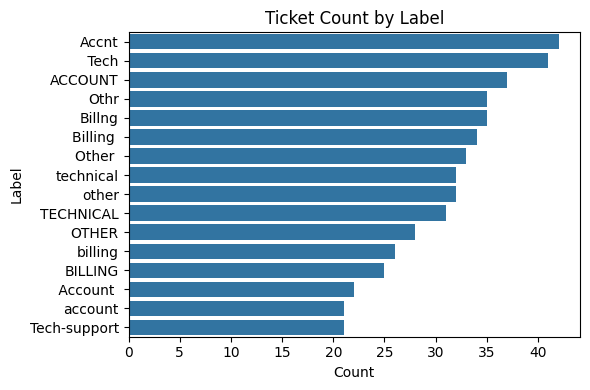

Displayed label distribution plot


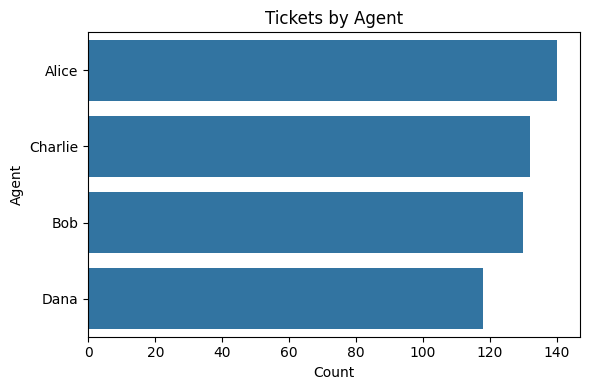

Displayed agent ticket count plot


In [ ]:
# Plot label distribution if label exists
import matplotlib.pyplot as plt
import seaborn as sns

if 'label' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
    plt.title('Ticket Count by Label')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.tight_layout()
    plt.show()
    print('Displayed label distribution plot')

# Plot top agents by ticket count if agent_name exists
if 'agent_name' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(y='agent_name', data=df, order=df['agent_name'].value_counts().index)
    plt.title('Tickets by Agent')
    plt.xlabel('Count')
    plt.ylabel('Agent')
    plt.tight_layout()
    plt.show()
    print('Displayed agent ticket count plot')

**DATA CLEANING AND PREPROCESSING**

Handle missing values, standardize categorical entries, and clean the text data.

In [ ]:
import re

# 1. Fill missing values in 'label' column with 'unknown'
df['label'] = df['label'].fillna('unknown')

# 2. Remove rows with missing values in 'text' column
df.dropna(subset=['text'], inplace=True)

# 3. Convert all entries in the 'label' column to lowercase and remove leading/trailing spaces
df['label'] = df['label'].str.lower().str.strip()

# 4. Apply the provided clean_text function to the 'text' column
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

# 5. Define a dictionary label_mapping to standardize variations
label_mapping = {
    'accnt': 'account',
    'tech': 'tech support',
    'technical': 'tech support',
    'tech-support': 'tech support',
    'othr': 'other',
    'billng': 'billing'
}

# 6. Replace the inconsistent label values in the 'label' column
df['label'] = df['label'].replace(label_mapping)

# 7. Print the count of missing values per column after handling
missing_values_count_after_cleaning = df.isnull().sum()
print("Missing values count per column after cleaning:")
print(missing_values_count_after_cleaning)

# 8. Print the frequency count of unique values in the 'label' column after standardization
print("\nFrequency count of unique values in 'label' after standardization:")
print(df['label'].value_counts(dropna=False))

Missing values count per column after cleaning:
text          0
label         0
ticket_id     0
agent_name    0
dtype: int64

Frequency count of unique values in 'label' after standardization:
label
other           125
tech support    119
account         115
billing         113
unknown          23
Name: count, dtype: int64


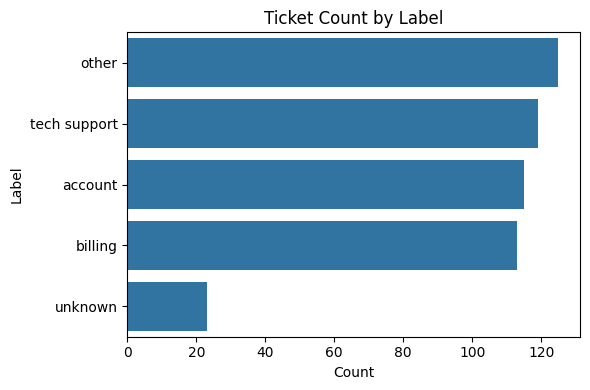

Displayed label distribution plot


In [ ]:
# Let us now visualize the data after data cleaning and standardization
if 'label' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
    plt.title('Ticket Count by Label')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.tight_layout()
    plt.show()
    print('Displayed label distribution plot')

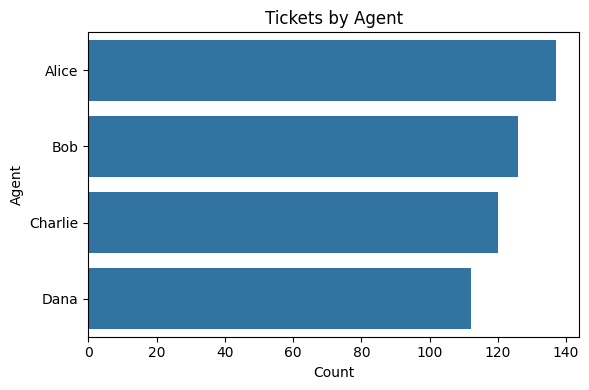

Displayed agent ticket count plot


In [ ]:
if 'agent_name' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(y='agent_name', data=df, order=df['agent_name'].value_counts().index)
    plt.title('Tickets by Agent')
    plt.xlabel('Count')
    plt.ylabel('Agent')
    plt.tight_layout()
    plt.show()
    print('Displayed agent ticket count plot')

**DATA SPLITTING FOR MODELING AND EVALUATION**

Divide the cleaned data into training and testing sets for model development and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (396,)
Shape of X_test: (99,)
Shape of y_train: (396,)
Shape of y_test: (99,)


**BASELINE MODEL BUILDING AND EVALUATION**

Construct and evaluate a simple baseline model (e.g., Majority Classifier) to establish a performance benchmark.

**Reasoning:** Import DummyClassifier, instantiate it with the 'most_frequent' strategy, train it on the training data, make predictions on the test data, calculate accuracy, and print the classification report and confusion matrix.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate a Majority Classifier model
majority_classifier = DummyClassifier(strategy="most_frequent")

# Train the model
majority_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = majority_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 0.25252525252525254

Classification Report:
              precision    recall  f1-score   support

     account       0.00      0.00      0.00        23
     billing       0.00      0.00      0.00        22
       other       0.25      1.00      0.40        25
tech support       0.00      0.00      0.00        24
     unknown       0.00      0.00      0.00         5

    accuracy                           0.25        99
   macro avg       0.05      0.20      0.08        99
weighted avg       0.06      0.25      0.10        99


Confusion Matrix:
[[ 0  0 23  0  0]
 [ 0  0 22  0  0]
 [ 0  0 25  0  0]
 [ 0  0 24  0  0]
 [ 0  0  5  0  0]]


**TEXT VECTORIZATION**

We now transform the text data into numerical features using TF-IDF.

**Reasoning:** Import the necessary library, instantiate the vectorizer, fit and transform the training data, and transform the test data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (396, 260)
Shape of X_test_tfidf: (99, 260)


**MODEL SELECTION**

We now choose a more advanced classification model (e.g., Logistic Regression) for improved performance.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

print("Logistic Regression model selected and instantiated.")

Logistic Regression model selected and instantiated.


**MODEL TRAINING**

Train the selected Logistic Regression model on the TF-IDF transformed training data.

**Reasoning:** Fit the Logistic Regression model to the TF-IDF transformed training data.

In [ ]:
# Fit the logistic regression model
logistic_regression_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model training complete.")

Logistic Regression model training complete.


**MODEL EVALUATION METRICS**

Evaluate the trained Logistic Regression model's performance on the TF-IDF transformed test data using appropriate metrics.

**Reasoning:** Make predictions on the test set and evaluate the model using accuracy, classification report, and confusion matrix.

In [ ]:
# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, zero_division=0)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Logistic Regression Model Accuracy: {accuracy_lr}")
print("\nLogistic Regression Model Classification Report:")
print(report_lr)
print("\nLogistic Regression Model Confusion Matrix:")
print(confusion_lr)

Logistic Regression Model Accuracy: 0.9494949494949495

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

     account       0.88      1.00      0.94        23
     billing       1.00      1.00      1.00        22
       other       1.00      1.00      1.00        25
tech support       0.92      1.00      0.96        24
     unknown       0.00      0.00      0.00         5

    accuracy                           0.95        99
   macro avg       0.76      0.80      0.78        99
weighted avg       0.90      0.95      0.93        99


Logistic Regression Model Confusion Matrix:
[[23  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 24  0]
 [ 3  0  0  2  0]]


**Checking Class Distribution**

This verifies which classes are missing from predictions

In [ ]:
import numpy as np
np.unique(y_pred)

array(['other'], dtype='<U5')

In [ ]:
np.unique(y_pred_lr)

array(['account', 'billing', 'other', 'tech support'], dtype=object)

In [ ]:
np.unique(y_test)

array(['account', 'billing', 'other', 'tech support', 'unknown'],
      dtype=object)

In [ ]:
np.unique(y_train)

array(['account', 'billing', 'other', 'tech support', 'unknown'],
      dtype=object)

In [ ]:
# Additional Models for Comparison

from sklearn.naive_bayes import GaussianNB

# Instantiate a Naive Bayes model
naive_bayes_model = GaussianNB()
print("Naive Bayes Model selected and instantiated.")

Naive Bayes Model selected and instantiated.


In [ ]:
# Fit the Naive Bayes model
naive_bayes_model.fit(X_train_tfidf.toarray(), y_train)
print("Naive Bayes Model training complete.")

Naive Bayes Model training complete.


In [ ]:
# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test_tfidf.toarray())

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, zero_division=0)
confusion_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Naive Bayes Model Accuracy: {accuracy_nb}")
print("\nNaive Bayes Model Classification Report:")
print(report_nb)
print("\nNaive Bayes Model Confusion Matrix:")
print(confusion_nb)

Naive Bayes Model Accuracy: 0.9393939393939394

Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

     account       0.88      1.00      0.94        23
     billing       1.00      0.95      0.98        22
       other       1.00      1.00      1.00        25
tech support       0.92      1.00      0.96        24
     unknown       0.00      0.00      0.00         5

    accuracy                           0.94        99
   macro avg       0.76      0.79      0.78        99
weighted avg       0.90      0.94      0.92        99


Naive Bayes Model Confusion Matrix:
[[23  0  0  0  0]
 [ 0 21  0  0  1]
 [ 0  0 25  0  0]
 [ 0  0  0 24  0]
 [ 3  0  0  2  0]]


In [ ]:
from sklearn.svm import SVC

# Instantiate a Support Vector Machine (SVM) model
svm_model = SVC()
print("Support Vector Machine Model selected and instantiated.")

# Fit the SVM model
svm_model.fit(X_train_tfidf.toarray(), y_train)
print("Support Vector Machine Model training complete.")

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf.toarray())

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Model Accuracy: {accuracy_svm}")
print("\nSVM Model Classification Report:")
print(report_svm)
print("\nsvm Confusion Matrix:")
print(confusion_svm)

Support Vector Machine Model selected and instantiated.
Support Vector Machine Model training complete.
SVM Model Accuracy: 0.9494949494949495

SVM Model Classification Report:
              precision    recall  f1-score   support

     account       0.88      1.00      0.94        23
     billing       1.00      1.00      1.00        22
       other       1.00      1.00      1.00        25
tech support       0.92      1.00      0.96        24
     unknown       0.00      0.00      0.00         5

    accuracy                           0.95        99
   macro avg       0.76      0.80      0.78        99
weighted avg       0.90      0.95      0.93        99


svm Confusion Matrix:
[[23  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 24  0]
 [ 3  0  0  2  0]]


**COMPARING THE PERFORMANCE OF THE MODELS**

In [ ]:
import pandas as pd

# Create a dictionary with the accuracy scores
accuracy_scores = {
    'Model': ['Baseline (Majority Class)', 'Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy': [accuracy, accuracy_lr, accuracy_nb, accuracy_svm]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the DataFrame
print("Model Accuracy Comparison:")
display(accuracy_df)

Model Accuracy Comparison:


,Model,Accuracy
0,Baseline (Majority Class),0.252525
1,Logistic Regression,0.949495
2,Naive Bayes,0.939394
3,SVM,0.949495
